In [0]:
#Сделаем распознавания цифр mnist,некий "Hello world",среди нейросетей
#Настоятельно рекомендую сначала ознакомится с примером sin_approximations

# Импонтируем необходимые библеотеки
import numpy as np 
# numpy - библеотека питон для работы с тензорами,она должна быть вам знакома из курса ml
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.utils import  to_categorical
# Воспользуемся уже готовым датасетом,который уже собрали
from tensorflow.keras.datasets import mnist

In [13]:
#скачиваем датасет
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 
print("Размерность тренировочного датасета: ",train_images.shape)

Размерность тренировочного датасета:  (60000, 28, 28)


In [0]:
"""
Пока что наша нейросеть не может знать о пространственном положении пикселей
Поэтому изменим размерность изображения,сделаем матрицу с 60000 строками,где
каждая строка - одна картинка,сделаем подобное преобразования и с тестовыми 
данными
Так же нормализуем наши изображения,приведем все значение пикселей к отрезку 
[0,1],вместо [0,255]
Преобразования типа пикселей к float32 необходимо для корректной нормализации
"""
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000,28 * 28))
test_images = test_images.astype('float32')/255

"""
сделаем небольшое преобразование,сейчас в train_labels и test_labels хранится
только вектора правильных ответов,преобразуем эти вектора в матрицу,где каждая
строка это массив из 10 чисел,где на месте числа из вектора стоит 1,а остальные 
нули ,пример:
[1,4,5,9] -> array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
                    [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
                    [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
                    [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])
Наша нейросеть на последнем слое будет иметь  10 нейронов с выходными 
значениями от 0 до 1,которое будет значить уверенность сети в том,что это 
изображение соответствует этому классу цифры.Поэтому это преобразования и нужно.
"""
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [15]:
model = models.Sequential() # Инициализируем модель
#добавляем слой Dense,указывая размерность входных данных
model.add(layers.Dense(64,activation = 'relu',input_shape=(28*28,))) 
#добавляем слой ответа,он будет возвращать вектор из 10 чисел
model.add(layers.Dense(10,activation = 'softmax'))
model.summary() #выводим информацию о модели 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs= 5,batch_size=64,verbose=1)

Epoch 1/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.3385 - acc: 0.9074
Epoch 2/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.1715 - acc: 0.9505
Epoch 3/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.1294 - acc: 0.9625
Epoch 4/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.1046 - acc: 0.9697
Epoch 5/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0887 - acc: 0.9746


[[7.6079893e-08 1.2520583e-10 1.4346984e-04 8.9917291e-04 2.7861649e-10
  2.7523177e-07 8.1119761e-15 9.9883288e-01 3.3805127e-06 1.2070166e-04]]


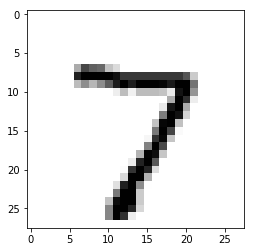

In [17]:
#Проверим верна ли наша модель,для 1 цифры в тестовом датасете
print(model.predict(test_images[0:1]))
plt.imshow(np.abs(test_images[0].reshape(28,28)-1),cmap="gray")
plt.show()
#Модель более чем уверенна,что это цифра семь,ей она дала 0.99 вероятность

In [18]:
#Проверим нашу нейросеть на всей тестовой выборке
test_loss,test_acc = model.evaluate(test_images,test_labels)
print('Результат accuracy на тестовой выборке ',test_acc)

10000/10000 [==============================] - 0s 27us/sample - loss: 0.0992 - acc: 0.9708
Результат accuracy на тестовой выборке  0.9708


#Тут весь код,если хотите запустить не в интерактивном режиме,в .py,то просто скопируетей код отсюда:

In [0]:
import numpy as np 
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.utils import  to_categorical
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 

train_images = train_images.reshape((60000,28 , 28,1))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000,28 , 28,1))
test_images = test_images.astype('float32')/255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model = models.Sequential()
model.add(layers.Dense(64,activation = 'relu',input_shape=(28*28,))) 
model.add(layers.Dense(10,activation = 'softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs= 5,batch_size=64,verbose=1)

test_loss,test_acc = model.evaluate(test_images,test_labels)
print('Результат accuracy на тестовой выборке ',test_acc)